In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
df = pd.read_csv('./GSE150150_raw_counts.csv')

In [3]:
columns = ["Trunk E9.5", "Trunk E10.5", "DRG E9.5", "DRG E10.5", "DRG E11.5", "DRG E12.5", "Cranio E12.5"]
idMappings = {
    "SS2_15_0085": "Trunk E9.5",
    "SS2_18_107": "Trunk E10.5",
    "SS2_18_108": "Trunk E10.5",
    "SS2_18_109": "Trunk E10.5",
    "SS2_16_767": "DRG E9.5",
    "SS2_17_435": "DRG E9.5",
    "SS2_16_688": "DRG E10.5",
    "SS2_16_769": "DRG E10.5",
    "SS2_17_432": "DRG E10.5",
    "SS2_17_433": "DRG E10.5",
    "SS2_16_385": "DRG E11.5",
    "SS2_16_384": "DRG E12.5",
    "SS2_15_0073": "Cranio E12.5",
    "SS2_15_0169": "Cranio E12.5"
}

In [4]:
print("Gene Count: ", len(df))
sampleRow = df.sample()
print("Sample Row: ", sampleRow)
print("Sample Gene: ", sampleRow.iloc[0,0])

Gene Count:  24582
Sample Row:          Gene  SS2_15_0073:A9_unique.bam  SS2_15_0073:A8_unique.bam  \
2350  Hoxd12                          0                          0   

      SS2_15_0073:A7_unique.bam  SS2_15_0073:A6_unique.bam  \
2350                          0                          0   

      SS2_15_0073:A5_unique.bam  SS2_15_0073:A4_unique.bam  \
2350                          0                          0   

      SS2_15_0073:A3_unique.bam  SS2_15_0073:A2_unique.bam  \
2350                          0                          0   

      SS2_15_0073:A10_unique.bam  ...  SS2_15_0085:P15_unique.bam  \
2350                           0  ...                           0   

      SS2_15_0085:P16_unique.bam  SS2_15_0085:P17_unique.bam  \
2350                           0                           0   

      SS2_15_0085:P18_unique.bam  SS2_15_0085:P19_unique.bam  \
2350                           0                           0   

      SS2_15_0085:P20_unique.bam  SS2_15_0085:P24_uniqu

In [5]:
import numbers
df.columns = [idMappings[col.split(":")[0]] if col.split(":")[0] in idMappings else col for col in df.columns]
dfParsed = df.groupby(df.columns, axis=1).apply(lambda x: x.mean(axis=1) if isinstance(x.iloc[0,0], numbers.Number) else x.iloc[:,0])
dfParsed = dfParsed[dfParsed.columns[5:].tolist() + dfParsed.columns[:5].tolist()]

print("Grouped Gene Count: ", len(dfParsed))
sampleRow = dfParsed.sample()
print("Grouped Sample Row: ", sampleRow)
print("Grouped Sample Gene: ", sampleRow.iloc[0,0])

Grouped Gene Count:  24582
Grouped Sample Row:          Gene  Trunk E10.5  Trunk E9.5  Cranio E12.5  DRG E10.5  DRG E11.5  \
2381  Zc3h15    29.746528   58.578125     42.153646  47.266927  51.109375   

      DRG E12.5   DRG E9.5  
2381  46.841146  54.032552  
Grouped Sample Gene:  Zc3h15


In [6]:
tDf = df.transpose()
tDf.head()

tdfParsed = dfParsed.transpose()
tdfParsed.head()

,0,1,2,3,4,5,6,7,8,9,...,24572,24573,24574,24575,24576,24577,24578,24579,24580,24581
Gene,ERCC-00130,ERCC-00004,ERCC-00136,ERCC-00108,ERCC-00116,ERCC-00092,ERCC-00095,ERCC-00131,ERCC-00062,ERCC-00019,...,Gm16367.6,Vmn1r62.1,Vmn1r186.1,Vmn1r63.1,Vmn1r187.1,Tmlhe,Vamp7,Spry3,Zf12,eGFP
Trunk E10.5,12.325521,1.344618,1.206597,1.137153,0.0,0.772569,0.052951,0.131944,0.020833,0.013021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010417
Trunk E9.5,2449.914062,860.182292,347.947917,333.122396,0.916667,160.559896,32.828125,13.666667,8.789062,4.151042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002604
Cranio E12.5,5203.221354,1872.364583,751.622396,862.201823,2.376302,410.634115,66.295573,29.571615,18.515625,10.16276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DRG E10.5,280.343099,59.985026,35.949219,30.908854,0.223307,20.534505,2.511719,1.432943,0.781901,0.306641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005859


In [7]:
tdfParsed.to_csv('./GSE150150_raw_counts_parsed.csv', index=True, header=False)
# dfParsed.head(100).to_csv('./GSE150150_raw_counts_parsed.csv', index=False)

In [8]:
import PyWGCNA
geneExp = './GSE150150_raw_counts_parsed.csv'
pyWGCNA = PyWGCNA.WGCNA(name='GSE150150', 
                              species='mus musculus', 
                              geneExpPath=geneExp, 
                              outputPath='',
                              save=True)
pyWGCNA.geneExpr.to_df().head(5)

Saving data to be True, checking requirements ...


,ERCC-00130,ERCC-00004,ERCC-00136,ERCC-00108,ERCC-00116,ERCC-00092,ERCC-00095,ERCC-00131,ERCC-00062,ERCC-00019,...,Gm16367.6,Vmn1r62.1,Vmn1r186.1,Vmn1r63.1,Vmn1r187.1,Tmlhe,Vamp7,Spry3,Zf12,eGFP
Gene,,,,,,,,,,,,,,,,,,,,,
Trunk E10.5,12.325521,1.344618,1.206597,1.137153,0.000000,0.772569,0.052951,0.131944,0.020833,0.013021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010417
Trunk E9.5,2449.914062,860.182312,347.947906,333.122406,0.916667,160.559891,32.828125,13.666667,8.789062,4.151042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002604
Cranio E12.5,5203.221191,1872.364624,751.622375,862.201843,2.376302,410.634125,66.295570,29.571615,18.515625,10.162761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
DRG E10.5,280.343109,59.985027,35.949219,30.908854,0.223307,20.534506,2.511719,1.432943,0.781901,0.306641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005859
DRG E11.5,384.346344,68.973961,46.658855,48.080730,0.023438,26.468750,3.299479,1.278646,0.585938,0.401042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002604


In [9]:
# pyWGCNA.geneExpr.to_df().transpose().head(5)

Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



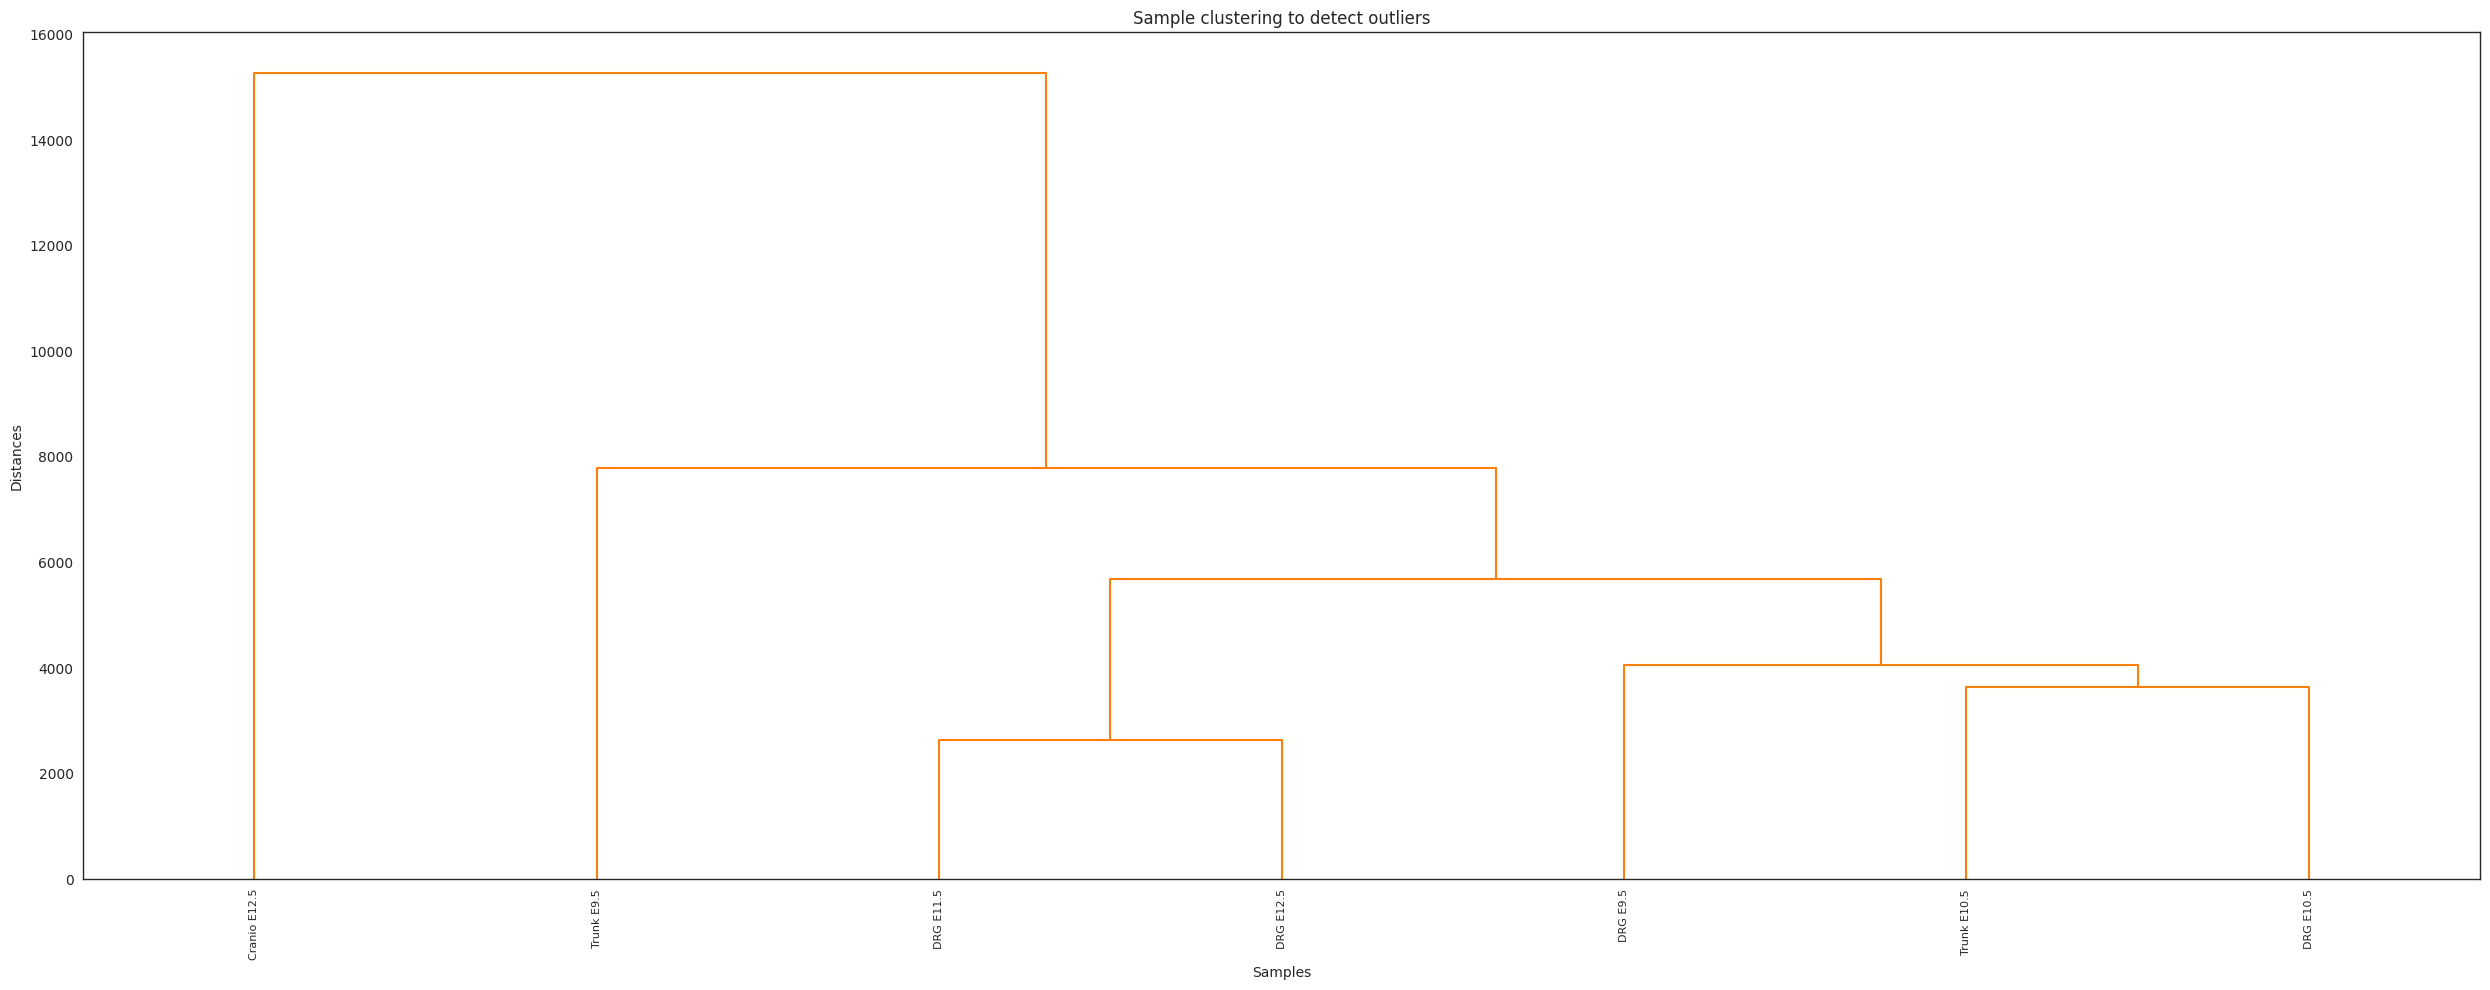

In [10]:
pyWGCNA.preprocess()

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  3305
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.481505  0.951095       0.422013  3883.079896  3946.280026   
1       2   0.10088  0.275551      -0.034178  2527.523787  2140.052369   
2       3  0.023894 -0.110603      -0.192926  1847.451408  1341.302509   
3       4  0.249719 -0.352795       0.045379  1439.459524   948.347334   
4       5  0.476637 -0.511503       0.327922  1168.227912   731.231186   
5       6  0.647164 -0.635501        0.55859    975.42952   582.803149   
6       7  0.749171 -0.723497       0.701702   831.758327    478.87229   
7       8   0.80481  -0.79092       0.779463   720.867491   405.302353   
8       9  0.841942 -0.839347       0.824231   632.917222   351.216423   
9      10  0.870558 -0.880719       0.857736   561.630361   303.889003   
10     11  0.889332 -0.914214       0.881032    502.81478   264.406094   
11     13

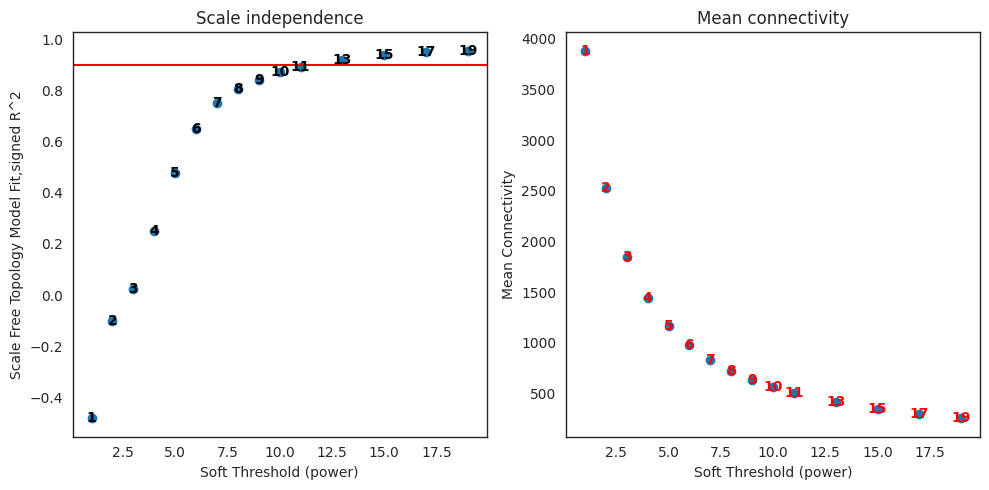

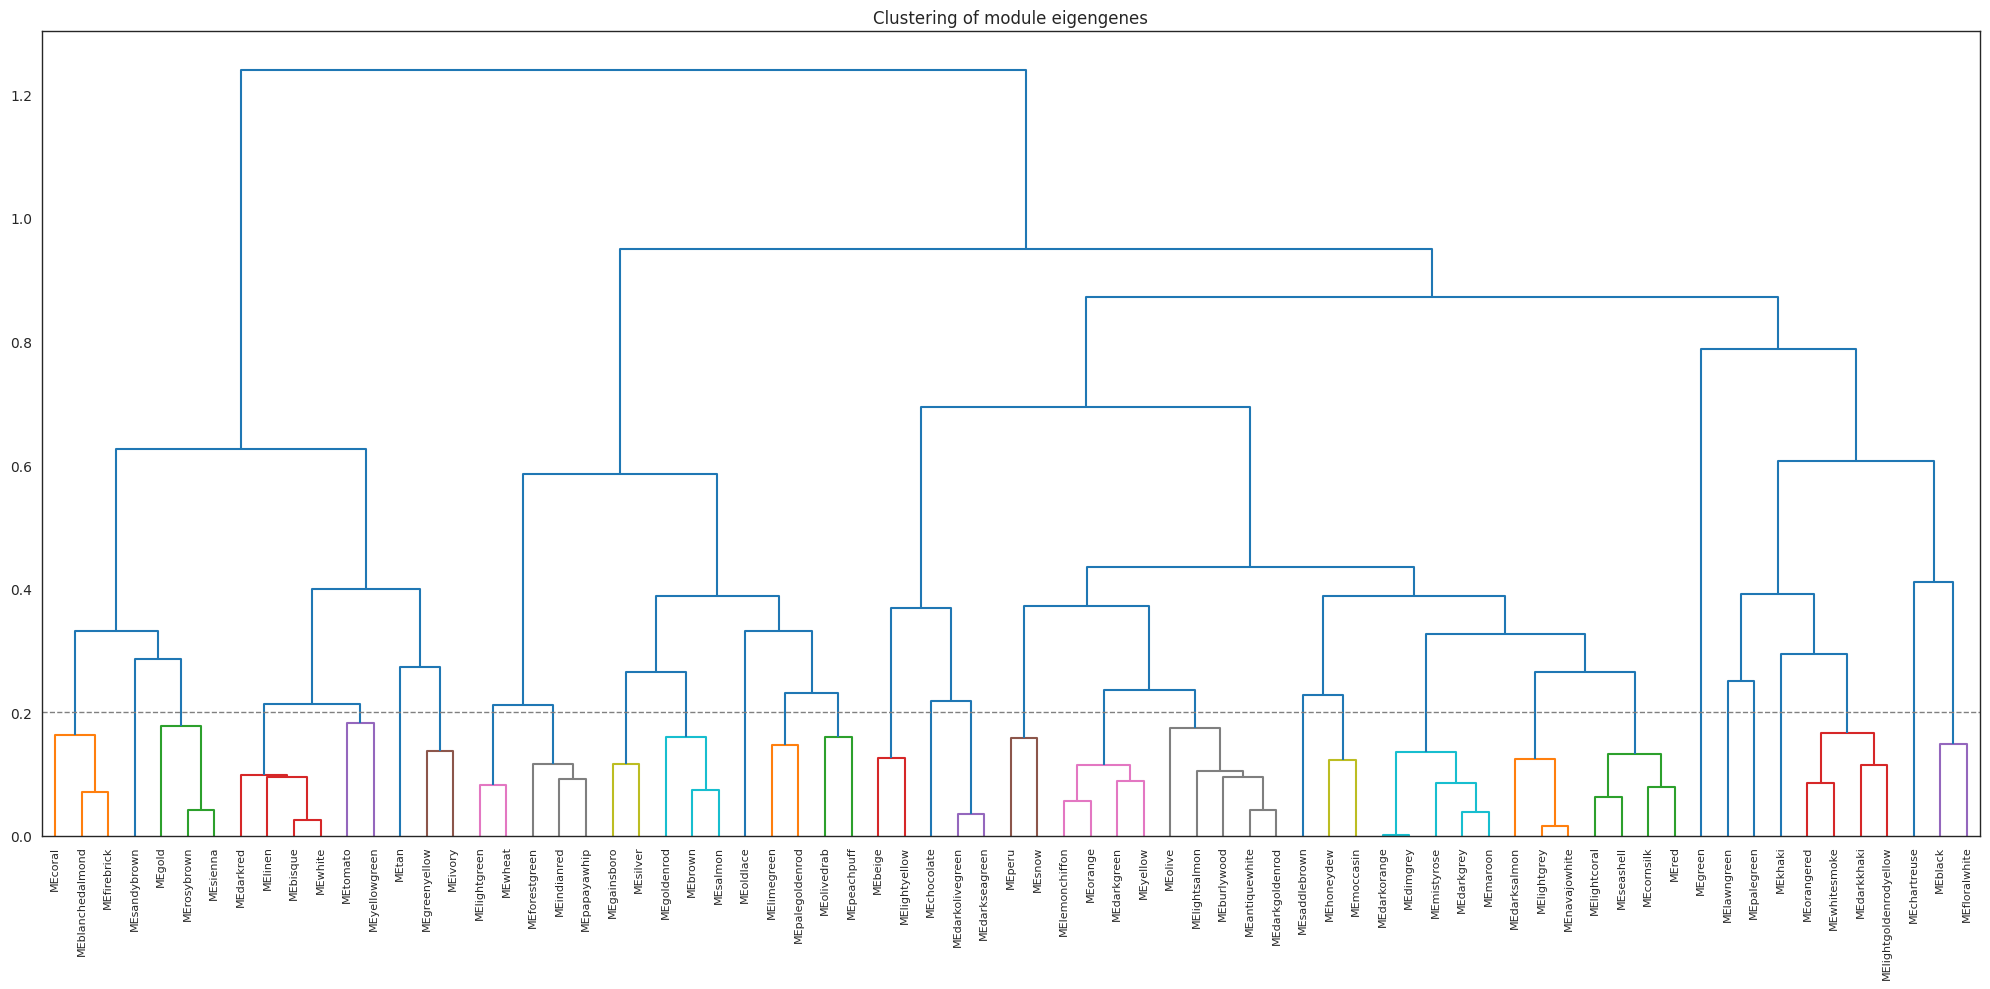

In [11]:
pyWGCNA.findModules()

In [12]:
# pyWGCNA.analyseWGCNA()

In [13]:
# pyWGCNA.saveWGCNA()

In [15]:
colourList = ['beige', 'bisque', 'black', 'blanchedalmond', 'brown', 'chartreuse', 'chocolate', 'darkolivegreen', 'forestgreen', 'green', 'greenyellow', 'khaki', 'lawngreen', 'lemonchiffon', 'limegreen', 'mistyrose', 'oldlace', 'palegreen', 'peru', 'saddlebrown', 'sandybrown', 'seashell', 'tan', 'whitesmoke']
Nociception = ["Ntrk1", "Runx1", "Prdm12", "Th", "Scn10a", "Syt13", "Stra6", "Gal", "Prdm8"]
Mechanoreception = ["Pdlim1","Mmd2", "Pou4f3", "Rnf144a", "Pou6f2", "Dio3", "Onecut3", "Tbx2", "Gpx3", "Ret"]
Mechanoreception1 = ["Pdlim1","Mmd2", "Pou4f3", "Rnf144a"]
Mechanoreception2 = ["Pou6f2", "Dio3", "Onecut3", "Tbx2", "Gpx3", "Ret"]
Proprioception = ["Ntrk3", "Runx3", "Mgst3", "Fam19a4", "Pcp4", "Grm3"]
Fate1 = ["Runx3", "Nfia"]
Fate2 = ["Pou6f2", "Nr5a2", "Hoxb5", "Pdlim1", "Egr1"]
Fate3 = ["Tcf15", "Pdlim1"]
Fate4 = ["Pou6f2", "Onecut3", "Dcc"]


NociceptionCluster = []
MechanoreceptionCluster = []
Mechanoreception1Cluster = []
Mechanoreception2Cluster = []
ProprioceptionCluster = []
Fate1Cluster = []
Fate2Cluster = []
Fate3Cluster = []
Fate4Cluster = []

for gene in Nociception:
    for color in colourList:
        geneList = pyWGCNA.top_n_hub_genes(moduleName=color, n=1000)
        if gene in geneList.index:
            NociceptionCluster.append(color)

for gene in Mechanoreception:
    for color in colourList:
        geneList = pyWGCNA.top_n_hub_genes(moduleName=color, n=1000)
        if gene in geneList.index:
            MechanoreceptionCluster.append(color)

for gene in Mechanoreception1:
    for color in colourList:
        geneList = pyWGCNA.top_n_hub_genes(moduleName=color, n=1000)
        if gene in geneList.index:
            Mechanoreception1Cluster.append(color)

for gene in Mechanoreception2:
    for color in colourList:
        geneList = pyWGCNA.top_n_hub_genes(moduleName=color, n=1000)
        if gene in geneList.index:
            Mechanoreception2Cluster.append(color)

for gene in Proprioception:
    for color in colourList:
        geneList = pyWGCNA.top_n_hub_genes(moduleName=color, n=1000)
        if gene in geneList.index:
            ProprioceptionCluster.append(color)

for gene in Fate1:
    for color in colourList:
        geneList = pyWGCNA.top_n_hub_genes(moduleName=color, n=1000)
        if gene in geneList.index:
            Fate1Cluster.append(color)

for gene in Fate2:
    for color in colourList:
        geneList = pyWGCNA.top_n_hub_genes(moduleName=color, n=1000)
        if gene in geneList.index:
            Fate2Cluster.append(color)
    
for gene in Fate3:
    for color in colourList:
        geneList = pyWGCNA.top_n_hub_genes(moduleName=color, n=1000)
        if gene in geneList.index:
            Fate3Cluster.append(color)

for gene in Fate4:
    for color in colourList:
        geneList = pyWGCNA.top_n_hub_genes(moduleName=color, n=1000)
        if gene in geneList.index:
            Fate4Cluster.append(color)


print("Nociception Cluster: ", NociceptionCluster)
print("Mechanoreception Cluster: ", MechanoreceptionCluster)
print("Mechanoreception1 Cluster: ", Mechanoreception1Cluster)
print("Mechanoreception2 Cluster: ", Mechanoreception2Cluster)
print("Proprioception Cluster: ", ProprioceptionCluster)
print("Fate1 Cluster: ", Fate1Cluster)
print("Fate2 Cluster: ", Fate2Cluster)
print("Fate3 Cluster: ", Fate3Cluster)
print("Fate4 Cluster: ", Fate4Cluster)


calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	

# Results

Nociception Cluster:  ['peru', 'peru', 'peru', 'peru', 'peru', 'peru', 'peru']
Mechanoreception Cluster:  ['peru', 'lemonchiffon', 'forestgreen']
Mechanoreception1 Cluster:  ['peru']
Mechanoreception2 Cluster:  ['lemonchiffon', 'forestgreen']
Proprioception Cluster:  ['peru', 'peru', 'peru', 'peru']
Fate1 Cluster:  ['peru']
Fate2 Cluster:  ['brown', 'lemonchiffon']
Fate3 Cluster:  ['saddlebrown']
Fate4 Cluster:  ['forestgreen']

In [19]:
NociceptionCluster = pyWGCNA.top_n_hub_genes(moduleName="peru", n=1000)
MechanoreceptionCluster = pyWGCNA.top_n_hub_genes(moduleName="lemonchiffon", n=1000)
Mechanoreception1Cluster = pyWGCNA.top_n_hub_genes(moduleName="peru", n=1000)
Mechanoreception2Cluster = pyWGCNA.top_n_hub_genes(moduleName="forestgreen", n=1000)
ProprioceptionCluster = pyWGCNA.top_n_hub_genes(moduleName="peru", n=1000)

nociceptionGenesDf = pd.DataFrame(NociceptionCluster.iloc[:,0].index)
mechanoreceptionGenesDf = pd.DataFrame(MechanoreceptionCluster.iloc[:,0].index)
mechanoreception1GenesDf = pd.DataFrame(Mechanoreception1Cluster.iloc[:,0].index)
mechanoreception2GenesDf = pd.DataFrame(Mechanoreception2Cluster.iloc[:,0].index)
proprioceptionGenesDf = pd.DataFrame(ProprioceptionCluster.iloc[:,0].index)

nociceptionGenesDf.to_csv("./data/wgcnanociceptionGenes.csv")
mechanoreceptionGenesDf.to_csv("./data/wgcnamechanoreceptionGenes.csv")
mechanoreception1GenesDf.to_csv("./data/wgcnamechanoreception1Genes.csv")
mechanoreception2GenesDf.to_csv("./data/wgcnamechanoreception2Genes.csv")
proprioceptionGenesDf.to_csv("./data/wgcnaproprioceptionGenes.csv")

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

Index(['Cdc42ep2', 'Syt5', 'Fam163b', 'Cacna2d2', 'Padi2', 'Gpr176', 'Lgals9',
       'Nrsn2', 'Kcna2', 'Atp2b3',
       ...
       'Wasf3', 'Cdc42ep1', 'Gpr157', 'Gnpda1', 'Ppp1r13l', 'Spint2', 'Xist',
       'Slmo1', 'Fut8', 'Sgk1'],
      dtype='object', length=918)
